**Exercise 4.1**

i) Generate an array of random integer numbers in range [10,1000] with size 100;
 
ii) Discretize this array into k= 10 bins, such that each bin is of equal width using (delta = xmax - xmin/k);

iii) Plot the histogram;

iv) Reapet i)-iii) by generating an array of random numbers by normal distribution with (loc=0.0, scale=1.0, size = 100);

v) Generate an array of random numbers by lognormal distribution with (mean=2.0, sigma=2.0, size=100) and plot the histogram by setting bins as [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90, 100].

### i) Generate an array of random integer numbers in range [10,1000] with size 100;

In [1]:
import random
import pandas as pd
import numpy as np
randomlist = []
for i in range(100):
    n = random.randint(10, 1000)
    randomlist.append(n)
print(randomlist)

[933, 338, 946, 342, 197, 951, 751, 14, 645, 905, 663, 963, 690, 25, 23, 446, 276, 578, 252, 125, 30, 102, 364, 858, 706, 878, 67, 417, 865, 331, 990, 285, 899, 827, 702, 284, 299, 384, 358, 611, 273, 124, 952, 654, 574, 856, 341, 439, 626, 350, 592, 432, 902, 273, 905, 649, 967, 674, 805, 351, 491, 772, 188, 827, 886, 132, 321, 638, 659, 615, 567, 865, 163, 337, 147, 592, 859, 613, 533, 211, 226, 700, 246, 661, 171, 18, 959, 646, 594, 250, 90, 529, 778, 643, 715, 763, 392, 142, 303, 324]


### ii) Discretize this array into k= 10 bins, such that each bin is of equal width using (delta = xmax - xmin/k);

In [2]:
randomlist.sort()
df=pd.DataFrame(randomlist,columns=["rlist"])
delta=(np.max(randomlist)-np.min(randomlist))/100
df['binned'] = pd.cut(x=df['rlist'], bins=[0, delta, delta*2, delta*3, delta*4,delta*5,delta*6,delta*7,delta*8,delta*9,delta*10])

### iii) Plot the histogram;

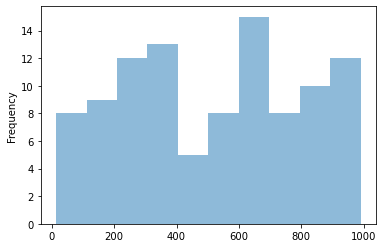

In [3]:
ax = df.loc[:, 'rlist'].plot.hist(bins=10, alpha=0.5)

### iv) Reapet i)-iii) by generating an array of random numbers by normal distribution with (loc=0.0, scale=1.0, size = 100);

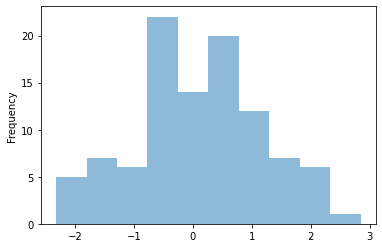

In [4]:
rlist=np.random.normal(loc=0.0, scale=1.0, size=100)
rlist.sort()
df = pd.DataFrame(rlist, columns=["rlist"])
delta = (np.max(rlist) - np.min(rlist)) / 100
df['binned'] = pd.cut(x=df['rlist'],
                          bins=[0, delta, delta * 2, delta * 3, delta * 4, delta * 5, delta * 6, delta * 7, delta * 8,
                                delta * 9, delta * 10])
ax = df.loc[:, 'rlist'].plot.hist(bins=10, alpha=0.5)

### v) Generate an array of random numbers by lognormal distribution with (mean=2.0, sigma=2.0, size=100) and plot the histogram by setting bins as [0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90, 100].

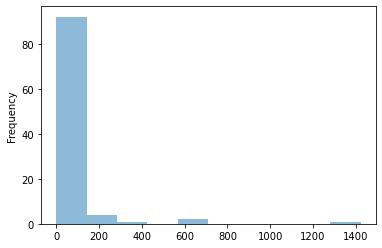

In [5]:
rlist = np.random.lognormal(mean=2.0, sigma=2.0, size=100)
rlist.sort()
df = pd.DataFrame(rlist, columns=["rlist"])
delta = (np.max(rlist) - np.min(rlist)) / 100
df['binned'] = pd.cut(x=df['rlist'],
                          bins=[0, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,90, 100])
# Plot the histogram;
ax = df.loc[:, 'rlist'].plot.hist(bins=10, alpha=0.5)

**Exercise 4.2**

Generate a data frame with 3 columns and 200 rows by selecting randomly selected numers: use for the first column the "normal" distribution with (loc=0.0, scale=1.0, size=200) and for the last 2 columns the "lognormal" distribution with (mean=0.0, sigma=2.0, size=200) and (mean=1.0, sigma=3.0, size=200).

Find any outlier with a z-value > 3 or z-value < -3 and replace that with the mean of the values, eg perform Mean substitution for outliers.

Write a report about cells with outliers, thier z-scores and substituted values. 


In [6]:
col1 = np.random.normal(loc=0.0, scale=1.0, size=200)
col2 = np.random.lognormal(mean=0.0,sigma=2.0,size=200)
col3 = np.random.lognormal(mean=1.0, sigma=3.0, size=200)
data2=np.vstack([col1,col2,col3])
data2=data2.transpose()
df=pd.DataFrame(data2,columns=['col1','col2','col3'])
print(df.shape)
print(df.mean())
# z=(x-mu)/sigma
cols = list(df.columns)
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    df[df[col_zscore]>3]=df[col].mean()
    df[df[col_zscore] < -3] = df[col].mean()
print(df.shape)

(200, 3)
col1      0.111854
col2      6.149277
col3    150.388708
dtype: float64
(200, 6)


**Exercise 4.3: PCA**

1) Apply PCA to the data - output of **Exercise 4.2** (where all outliers are with substituted values) in order to reduce the dimension from 3 to 2 (use "PCA(n_components = 2)". 

2) Transform your data (3 dimensional) to a new data (2 dimensional) by applying "pca.transform", then print the shapes and the first 5 rows of your data and new/transformed data.

In [7]:
from sklearn.decomposition import PCA
cols=df.columns
dfn=df[["col1_zscore","col2_zscore","col3_zscore"]]
pca = PCA(n_components=2)
pca.fit(dfn)
ndata=pca.transform(dfn)
dft=pd.DataFrame(ndata)
print(ndata.shape)
print(dfn.head(5))
print(dft.head(5))

(200, 2)
   col1_zscore  col2_zscore  col3_zscore
0    -1.128679     1.275236    -0.136058
1     0.080949    -0.184222    -0.136687
2    -0.040858     0.424357    -0.135684
3     0.392812     0.028004    -0.132788
4    -0.921038    -0.353953    -0.104955
          0         1
0 -2.687847 -0.672897
1 -2.832541 -0.056773
2 -2.550675 -0.068032
3 -2.527428  0.164650
4 -3.491388 -0.744565
